# Ekhator Uwaila's Notebook

In [2]:
import pandas as pd
import numpy as np
from collections import Counter as ctr

In [3]:
train = pd.read_csv('train.txt', sep=' ', header=None, names=['words','pos','phrase'],index_col=False)[['words','pos']]
test = pd.read_csv('test.txt', sep=' ', header=None, names=['words','pos','phrase'],index_col=False)[['words','pos']]

In [4]:
train = train.dropna()

In [5]:
test = test.dropna()

In [6]:
train.head()

,words,pos
0,Confidence,NN
1,in,IN
2,the,DT
3,pound,NN
4,is,VBZ


In [22]:
test.head()

,words,pos
0,Rockwell,NNP
1,International,NNP
2,Corp.,NNP
3,'s,POS
4,Tulsa,NNP


## Emission Probability

This is calculated using Bayes Theorem:

$P(T|W) = \frac{P(W|T).P(T)}{P(W)}$ 

where $P(T|W)$ is prob_of_tag_given_word aka Emission probability <br>
$P(W|T)$ is prob_of_word_given_tag <br>
$P(W)$ is prob_of_word <br>
$P(T)$ is prob_of_tag

In [6]:
pos_ctr = ctr(train.pos)
def prob_of_tag(T=''):
    """ Calculate the probability of each tag in the dataset """
    if T not in pos_ctr: return 0.0001
    return pos_ctr[T] / len(train)

In [7]:
word_ctr = ctr(train.words)
def prob_of_word(W=''):
    """ Calculate the probability of each word in the dataset """
    if W not in word_ctr: return 0.0001
    return word_ctr[W] / len(train)

In [9]:
# def prob_of_tag_and_word(T='', W=''):
#     """ Calculate the joint probability of a tag/pos and word in the dataset """
#     joint = len(train[(train['pos'] == T ) & (train['words'] == W)])
#     jointd = joint / len(train)
#     if T not in pos_ctr: return 0.0001
#     if W not in word_ctr : return 0.0001
#     return jointd

In [10]:
# def prob_of_word_given_tag(W='',T=''):
#     """ Prob of a word|tag """
#     if T not in pos_ctr: return 0.0001
#     if W not in word_ctr : return 0.0001
#     return prob_of_tag_and_word(T,W)/prob_of_tag(T)

In [9]:
words_tags = {}

for tag in list(set(train['pos'])):
    sub_df = train[train['pos'] == tag]
    words_tags[tag] = []
    for word in sub_df['words']:
        words_tags[tag].append(word)
    words_tags[tag] = ctr(words_tags[tag])

def prob_of_word_given_tag(W='', T=''):
    """ Prob of a word|tag """
    t = words_tags[T]
    if W not in t: return 0.000000001
    return t[W] / sum(t.values())


In [10]:
#Emission Probability aka Prob_of_tag_given_word
def emission_prob(T='',W=''):
    """ Prob of a tag|word AKA Emission prob"""
    if T not in pos_ctr: return 0.0001
    if W not in word_ctr : return 0.0001
    return (prob_of_word_given_tag(W,T) * prob_of_tag(T)) / prob_of_word(W)

In [12]:
#Testing that my functions work
emission_prob(T='DT',W='the')

0.9981559822106518

In [12]:
#Testing that my functions work
prob_of_word_given_tag(W='the',T='DT')

0.5018816471229888

## Transition Probability

This is calculated using the multiplication rule:<br>
$P(T,T_{i-1})= P(T_{i-1}).P(T|T_{i-1}) $ 
which can be expressed as follows to get the transition probability:<br>
$P(T|T_{i-1}) = \frac{P(T,T_{i-1})}{P(T_{i-1})} $ <br>
<br>
where
$P(T|T_{i-1})$ is the transition_prob i.e. the probability of getting a tag given the tag that preceeds it or probability of transitioning from $T_{i-1}$ to $T$
<br>
$P(T,T_{i-1})$ is the probability of getting a tag and a previous tag, gotten using "tag_sequences_ctr[(prevT), (nextT)] "
<br>
$P(T_{i-1})$ is the probability of getting a previous tag, gotten using "pos_ctr[prevT]"

Lets create a list of tuples which stores a pos/tag and the tag that comes after it:

In [13]:
# Count parts of speech sequences
tag_sequences = list(zip(train['pos'], train['pos'].shift(-1)))
tag_sequences_ctr = ctr(tag_sequences)

In [14]:
tag_sequences

[('NN', 'IN'),
 ('IN', 'DT'),
 ('DT', 'NN'),
 ('NN', 'VBZ'),
 ('VBZ', 'RB'),
 ('RB', 'VBN'),
 ('VBN', 'TO'),
 ('TO', 'VB'),
 ('VB', 'DT'),
 ('DT', 'JJ'),
 ('JJ', 'NN'),
 ('NN', 'IN'),
 ('IN', 'NN'),
 ('NN', 'NNS'),
 ('NNS', 'IN'),
 ('IN', 'NNP'),
 ('NNP', ','),
 (',', 'JJ'),
 ('JJ', 'IN'),
 ('IN', 'NN'),
 ('NN', 'NN'),
 ('NN', ','),
 (',', 'VB'),
 ('VB', 'TO'),
 ('TO', 'VB'),
 ('VB', 'DT'),
 ('DT', 'JJ'),
 ('JJ', 'NN'),
 ('NN', 'IN'),
 ('IN', 'NNP'),
 ('NNP', 'CC'),
 ('CC', 'NNP'),
 ('NNP', 'POS'),
 ('POS', 'JJ'),
 ('JJ', 'NNS'),
 ('NNS', '.'),
 ('.', 'NNP'),
 ('NNP', 'IN'),
 ('IN', 'DT'),
 ('DT', 'NNP'),
 ('NNP', 'NNP'),
 ('NNP', 'NNP'),
 ('NNP', 'POS'),
 ('POS', 'VBN'),
 ('VBN', 'NN'),
 ('NN', 'TO'),
 ('TO', 'DT'),
 ('DT', 'NN'),
 ('NN', 'JJ'),
 ('JJ', 'NN'),
 ('NN', 'VBZ'),
 ('VBZ', 'VBN'),
 ('VBN', 'TO'),
 ('TO', 'VB'),
 ('VB', 'DT'),
 ('DT', 'NN'),
 ('NN', 'IN'),
 ('IN', 'NN'),
 ('NN', 'IN'),
 ('IN', 'DT'),
 ('DT', 'JJ'),
 ('JJ', 'NN'),
 ('NN', '.'),
 ('.', 'CC'),
 ('CC', 'NNS'),


In [15]:
#Transition probability
def transition_prob(prevT, nextT):
    """ This calculates the transition probability, 
    that is the probability of getting a tag given the tag that preceeds it.
    P(T|Ti-1) """
    if prevT not in pos_ctr: return 0.0001
    if nextT not in pos_ctr: return 0.0001
    return tag_sequences_ctr[(prevT), (nextT)] / pos_ctr[prevT]


In [16]:
#Testing my transition probability function
transition_prob('DT', 'NN') #Probability of transitioning from 'DT' to 'NN or 
# prob that the next tag is 'NN' given that the previous is 'DT''

0.48453776929370057

## Viterbi Decoder

In [19]:
def viterbi_decoder(words, train_bag=train):
    tags = [] #Initializes an empty list tags to store the predicted POS tags 
    T = list(set(train['pos'])) #Creates a list T containing all unique POS tags present in the training data.

    for key, word in enumerate(words):
        # Initialize probability list for the current word
        p = []
        
        for tag in T:
            if key == 0: #first word
                transition_p = transition_prob('START', tag)
            else:
                # Calculate transition probability based on the previous tag and the current tag
                transition_p = transition_prob(tags[-1], tag)
               

            # Calculate emission probability for the current word and tag
            emission_p = emission_prob(tag, words[key])
            
            # Compute the probability of the current tag for the current word
            tags_probability = emission_p * transition_p
            
            # Append the probability to the probability list
            p.append(tags_probability)

        # Find the maximum probability and corresponding tag
        pmax = max(p)
        tags_max = T[p.index(pmax)]

        # Append the predicted tag to the list of tags
        tags.append(tags_max)

    return words, tags


In [20]:
#Testing my Viterbi Decoder
words = ['The', 'cat', 'is', 'on', 'the', 'mat']
result = viterbi_decoder(words)
print(result)

(['The', 'cat', 'is', 'on', 'the', 'mat'], ['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN'])


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
# Extract words and corresponding POS tags from the test DataFrame
test_words = test['words'] #list(test['words'])
test_pos = test['pos']

# Use the Viterbi decoder function to predict POS tags for test words
predicted_pos = viterbi_decoder(test_words)[1]

In [23]:
# Calculate accuracy using scikit-learn's accuracy_score function
accuracy = accuracy_score(predicted_pos, test_pos)
print("Accuracy:", accuracy)

Accuracy: 0.9222829643075754


When i tried implementing the Viterbi on the entire test dataset, it kept running for hours and never produced an output. I tried to modify it in various ways and also tried using the periods to break it into sentences but it still kept running for hours.

## Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(test['pos'],predicted_pos)
conf_matrix

array([[  9,   0,   0, ...,   0,   0,   0],
       [  0, 382,   0, ...,   0,   0,   0],
       [  0,   0, 301, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   4,   0,   0],
       [  0,   0,   0, ...,   0,  92,   0],
       [  0,   0,   0, ...,   0,   0, 322]])

<Figure size 1500x1200 with 0 Axes>

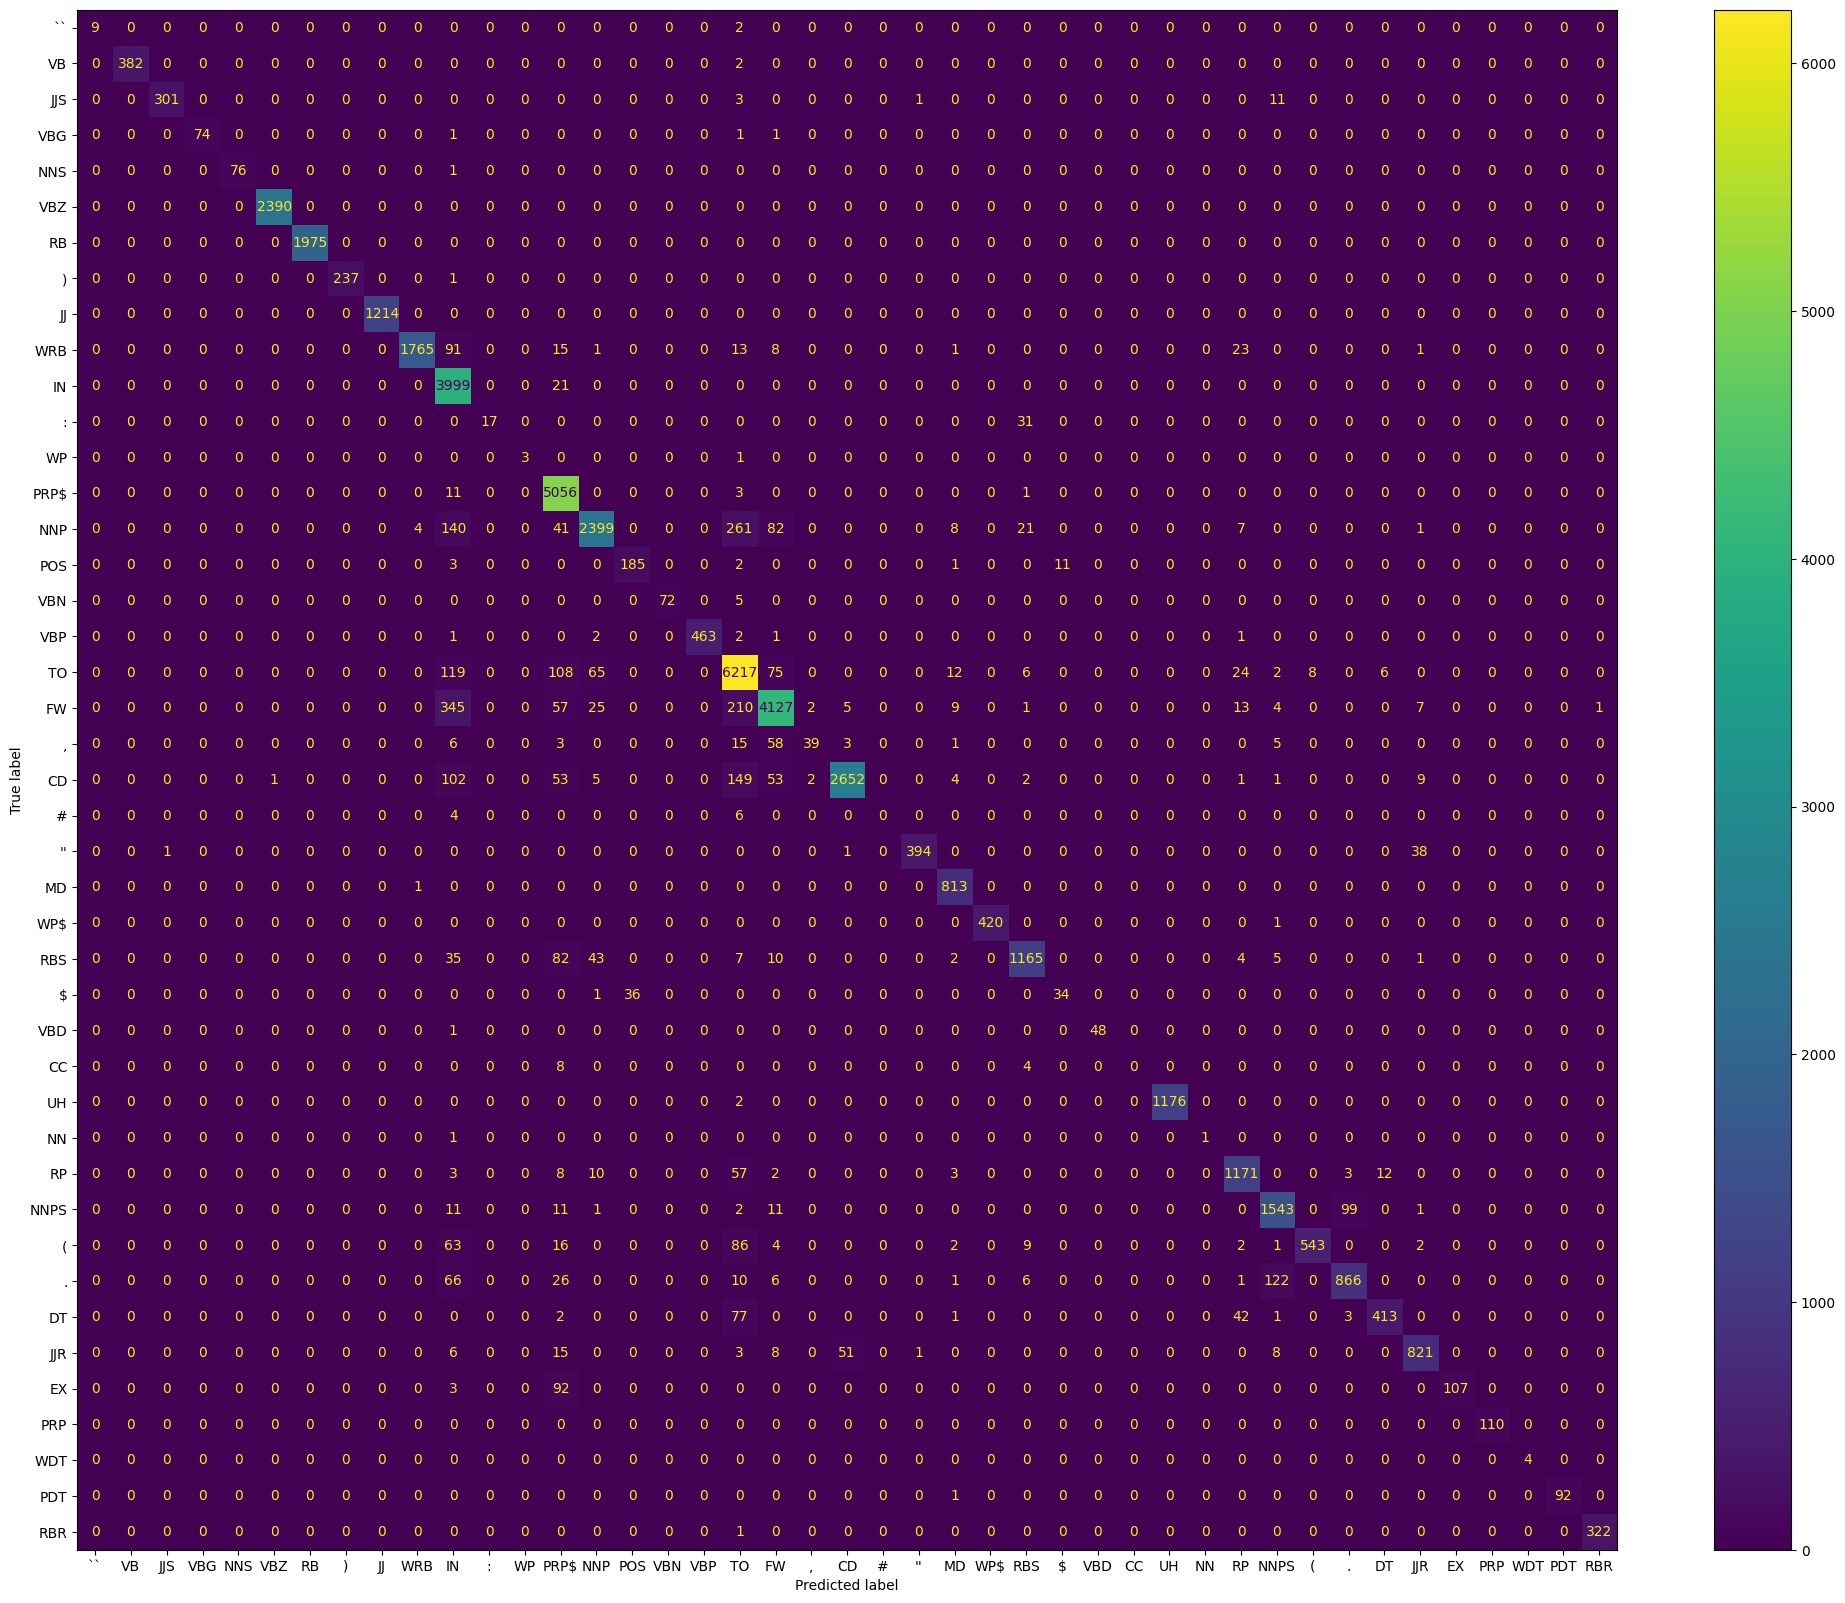

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=set(test['pos']))
fig, ax = plt.subplots(figsize=(25,20))
disp.plot(ax=ax)
plt.show()

 ### Given the confusion matrix, what are some common errors that your tagger makes?
 - It mistags FW as IN
 - It mistags NNP as TO
 - It mistags CD as IN
 - It mistags a lot of punctuation marks.